C:\Users\PC\AppData\Local\Temp\ipykernel_32424\2648006142.py:30: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(row['end_location_y'], row['end_location_z'],  # Coordinates of the shot


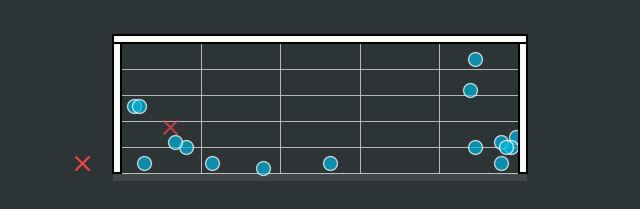

In [1]:
from goal_plot import draw_goal              # Import the goal drawing function from the goal_plot package
import pandas as pd                         # Import pandas for data manipulation
import matplotlib.pyplot as plt             # Import matplotlib for plotting

# 🔹 Load your own shot data here
df = pd.read_csv('my_data.csv')             # Load your dataset (replace 'my_data.csv' with your file)
df_penalty = df[df['penalty'] == True]      # Filter only penalty shots
df_penalty[['end_location_x', 'end_location_y', 'end_location_z', 'outcome_name']]  # Focus on needed columns
df_clean = df_penalty.dropna(subset=['end_location_y', 'end_location_z'])  # Remove shots with missing end location

# 🔹 Create the figure and axis with dark background
fig, ax = plt.subplots(figsize=(8, 5))      # Create the matplotlib figure and axis
fig.patch.set_facecolor('#2d3436')          # Set background color for the figure
ax.set_facecolor('#2d3436')                 # Set background color for the plot

# 🔹 Draw the goal
draw_goal(ax)                               # Use the draw_goal function from goal_plot

# 🔹 Plot each penalty shot as a scatter point
for i, row in df_clean.iterrows():          # Loop through each clean penalty shot
    color = '#00b4db' if row['outcome_name'] == 'Goal' else '#ff4444'  # Blue for goal, red for miss
    if row['outcome_name'] == 'Goal':
        marker = "o"                        # Use a circle for goals
        size = 100                          # Size of the point
    else:
        marker = 'x'                        # Use an X for missed shots
        size = 100
    
    # Scatter plot for each shot
    ax.scatter(row['end_location_y'], row['end_location_z'],  # Coordinates of the shot
               marker=marker, s=size, color=color, alpha=0.7,  # Style
               edgecolor='white')                              # White border for better visibility

# 🔹 Save and display the final plot
plt.savefig('goal_draw.png')                # Save the figure as an image
plt.show()                                  # Display the plot
